In [24]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer


%matplotlib inline

In [2]:
train_file = 'train.csv'
test_file = 'test.csv'

In [3]:
def import_data(filename):
    return pd.read_csv(filename)

# **Exploratory data analysis**

In [4]:
X_train = import_data(train_file)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
X_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


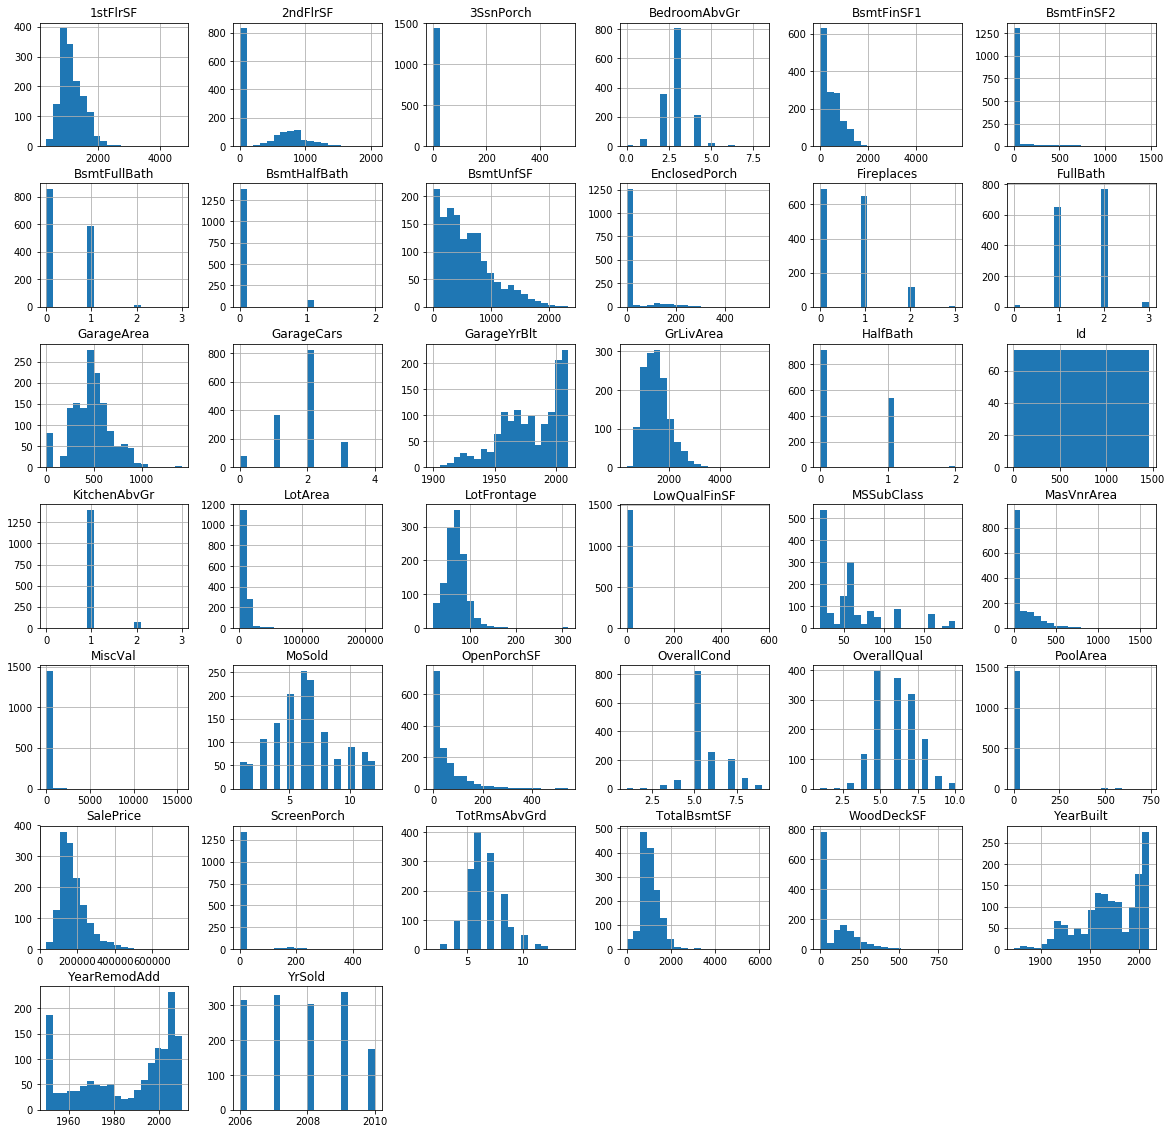

In [6]:
X_train.hist(figsize=(20,20), bins=20)
plt.show()

Looking at the histograms:
* SalePrice needs to be normalized because it is right skewed
* There are a couple of features that have a lot of values near 0:
   * Pool Area
   * 3SsnPorch
   * MiscVal

Let's get a closer look at these different features

In [7]:
X_train[['PoolArea','3SsnPorch','MiscVal']].describe()

,PoolArea,3SsnPorch,MiscVal
count,1460.000000,1460.000000,1460.000000
mean,2.758904,3.409589,43.489041
std,40.177307,29.317331,496.123024
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,738.000000,508.000000,15500.000000


In [8]:
corr_matrix = X_train.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

# **What have we learned**

The data set has some columns contining a lot of NaN values: Alley,FireplaceQu, PoolQC, Fence, MiscFeature.

There are some features with many 0's such as: PoolArea, 3SsnPorch, MiscVal.

We can potentially get rid of these columns.

The correlation matrix shows some of these columns overlap: PoolArea,3SsnPorch,MiscVal.

Let's plot a heatmap to show these correlations and then start working with the data.

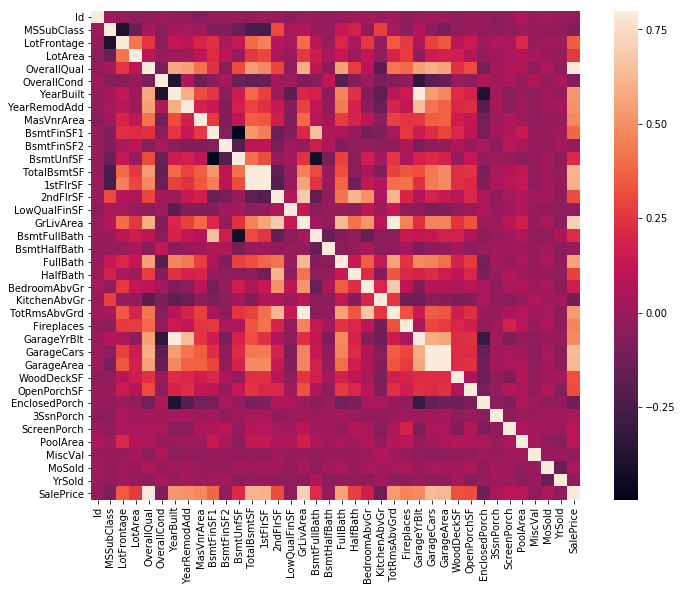

In [10]:
fig,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix,vmax=.8,square=True)

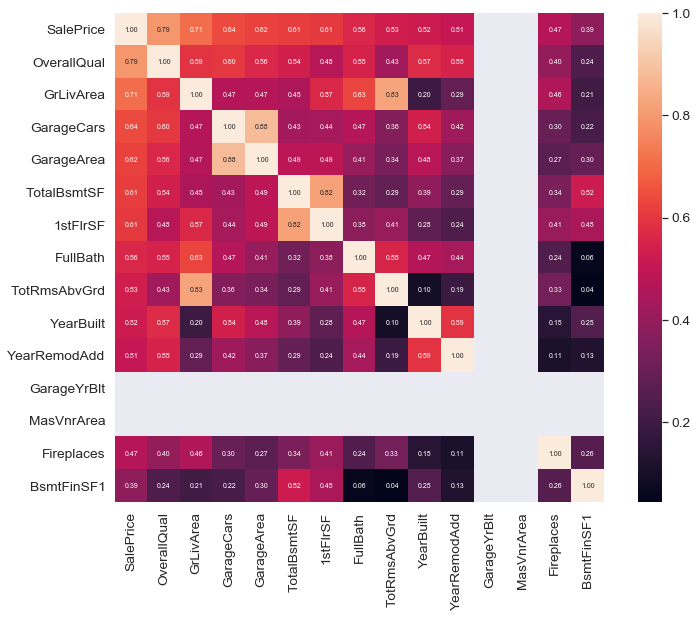

In [11]:
corr_num = 15
corr_cols = corr_matrix.nlargest(corr_num,'SalePrice')['SalePrice'].index
corr_mat_sales = np.corrcoef(X_train[corr_cols].values.T)
sns.set(font_scale=1.25)
fig,ax = plt.subplots(figsize=(12,9))
hm = sns.heatmap(corr_mat_sales, cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':7}, yticklabels=corr_cols.values, xticklabels=corr_cols.values)

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# **Heatmap**

From this heat map we can gauge what features have a linear relationship to SalePrice but we can also gauge if other features are co-linear.

There are some features that show co-linearity:
    * 1stFlrSF and TotalBsmtSF
    * GarageCars and GarageArea

We should decide which of these to get rid of to simplify our features. This co-linearity can inflate the variance of some linear regression coefficients.

I think we should get rid of 1stFlrSF and GarageArea because the other two features seem to be more correlated with SalePrice.

In [30]:
num_drop_cols = ['1stFlrSF','GarageArea','MiscVal','3SsnPorch','PoolArea']
cat_drop_cols = ['Alley','FireplaceQu','PoolQC','MiscFeature','Fence']

# **Now let's start cleaning the data and working with numbers**

We need to create a bunch of transformations to create a custom pipline to modularize our data cleaning.
    * One to normalize our SalePrice
    * One to select only the numerical and categorical dtypes
    * One to drop columns that we don't need
    * Create a pipeline for the numerical attributes
    * Create a pipeline for the categorical attributes
    * Create a full pipeline

In [13]:
from sklearn.base import TransformerMixin,BaseEstimator

#creating a custom transformer to normalize our SalePrice
class Normalize(BaseEstimator,TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self,X,y=None):
        dataset = y_train.copy()
        dataset = np.log(dataset)
        return dataset

In [17]:
#create a separate dataframe for the numerical and categorical dtypes
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attr = []):
        self.attr = attr
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        return X.loc[:,self.attr]

In [18]:
#create a custom transformer to drop columns
class DropColumns(BaseEstimator,TransformerMixin):
    def __init__(self,drop_columns=[]):
        self.drop_columns=drop_columns
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X = X.copy()
        return X.drop(self.drop_columns,axis=1)
        

In [36]:
num_attr = X_train.select_dtypes([np.int64,np.float64]).columns.values
cat_attr = X_train.select_dtypes([object]).columns.values
train_id = X_train['Id']
y_train = X_train['SalePrice']
X_train.drop(['Id','SalePrice'],axis=1,inplace=True)


KeyError: 'Id'

In [37]:
y_normalized = Normalize().transform(y_train)

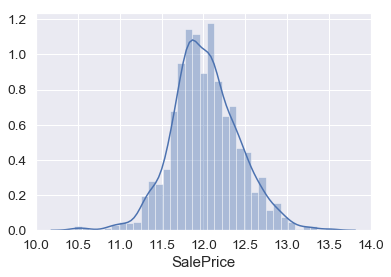

In [38]:
sns.distplot(y_normalized)

In [32]:
from sklearn.pipeline import Pipeline,FeatureUnion

num_pipeline = Pipeline([
    ('selection', DataFrameSelector(num_attr)),
    ('drop',DropColumns(num_drop_cols)),
    ('impute',SimpleImputer()),
    ('std_scale', StandardScaler()),    
])

cat_pipeline = Pipeline([
    ('selection',DataFrameSelector(cat_attr)),
    ('drop',DropColumns(cat_drop_cols)),
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encode',OneHotEncoder(sparse=False,handle_unknown='ignore')),
    ('std_scale',StandardScaler())
])

full_pipeline = FeatureUnion([
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline)
])

In [33]:
X_train_cleaned = pd.DataFrame(full_pipeline.fit_transform(X_train))

c:\users\krist\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [35]:
X_train_cleaned.head()

,0,1,2,3,4,5,6,7,8,9,...,255,256,257,258,259,260,261,262,263,264
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_cleaned,y_normalized)
sale_predict = lin_reg.predict(X_train_cleaned)
lin_mse = mean_squared_error(y_normalized,sale_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.09649741748707413

In [40]:
test = import_data(test_file)

In [43]:
test_id = test['Id']
test.drop('Id',axis=1,inplace=True)

In [44]:
test_clean = full_pipeline.transform(test)

c:\users\krist\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [46]:
predictions = lin_reg.predict(test_clean)

In [49]:
final_submission = pd.DataFrame({'Id':test_id,'SalePrice':np.exp(predictions)})
final_submission.to_csv('prediction.csv',index=False)

c:\users\krist\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
